In [1]:
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score

import tensorflow as tf

In [2]:
train_file_id = '10SC3OItZUbk7xTl-foQq8tLFu-njJflN'
train_output_file = 'train.csv'  

train_download_url = f'https://drive.google.com/uc?id={train_file_id}'

gdown.download(train_download_url, train_output_file, quiet=False)

df = pd.read_csv(train_output_file)

Downloading...
From: https://drive.google.com/uc?id=10SC3OItZUbk7xTl-foQq8tLFu-njJflN
To: d:\Document\Bangkit\Binary Classifcation with NN\train.csv
100%|██████████| 317k/317k [00:06<00:00, 51.1kB/s]


# Data Information

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
variables = [col for col in df.columns if df[col].nunique() <= 10]
for var in variables:
  print(f"====={var}=====")
  unique_values = df[var].unique()
  n_unique_values = df[var].nunique()
  value_counts = df[var].value_counts()

  print(f"Unique values in {var}: {unique_values}")
  print(f"Number of unique values in {var}: {n_unique_values}")
  print(f"Value counts in {var}:\n{value_counts}\n")

=====gender=====
Unique values in gender: ['Male' 'Female' 'Other']
Number of unique values in gender: 3
Value counts in gender:
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

=====hypertension=====
Unique values in hypertension: [0 1]
Number of unique values in hypertension: 2
Value counts in hypertension:
hypertension
0    4612
1     498
Name: count, dtype: int64

=====heart_disease=====
Unique values in heart_disease: [1 0]
Number of unique values in heart_disease: 2
Value counts in heart_disease:
heart_disease
0    4834
1     276
Name: count, dtype: int64

=====ever_married=====
Unique values in ever_married: ['Yes' 'No']
Number of unique values in ever_married: 2
Value counts in ever_married:
ever_married
Yes    3353
No     1757
Name: count, dtype: int64

=====work_type=====
Unique values in work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Number of unique values in work_type: 5
Value counts in work_type:
work_type
Private

# Data Cleaning

In [6]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Feature Engineering

## Encoding

In [7]:
columns_to_encoding = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
le = LabelEncoder()
for col in columns_to_encoding:
    df[col] = le.fit_transform(df[col])
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1


# Modelling

## Train test split

In [8]:
features = [col for col in df.columns if col not in ['stroke']]
target = 'stroke'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
inputs = tf.keras.layers.Input(shape=(X_train.shape[1],))
x = tf.keras.layers.Dense(256, activation='relu')(inputs)
x = tf.keras.layers.Dropout(0.6)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.6)(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dropout(0.6)(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dropout(0.6)(x)
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)
nn = tf.keras.Model(inputs, output, name="stroke_predictor")

nn.summary()


Model: "stroke_predictor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 11)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,337 (181.00 KB)

 Trainable params: 46,337 (181.00 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
nn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  
    patience=30,
    restore_best_weights=True
)

history = nn.fit(
    X_train,
    y_train,
    epochs=1000,  
    callbacks=[early_stopping],
    validation_data=(X_test, y_test),
    verbose=0  
)

# Model Evaluation

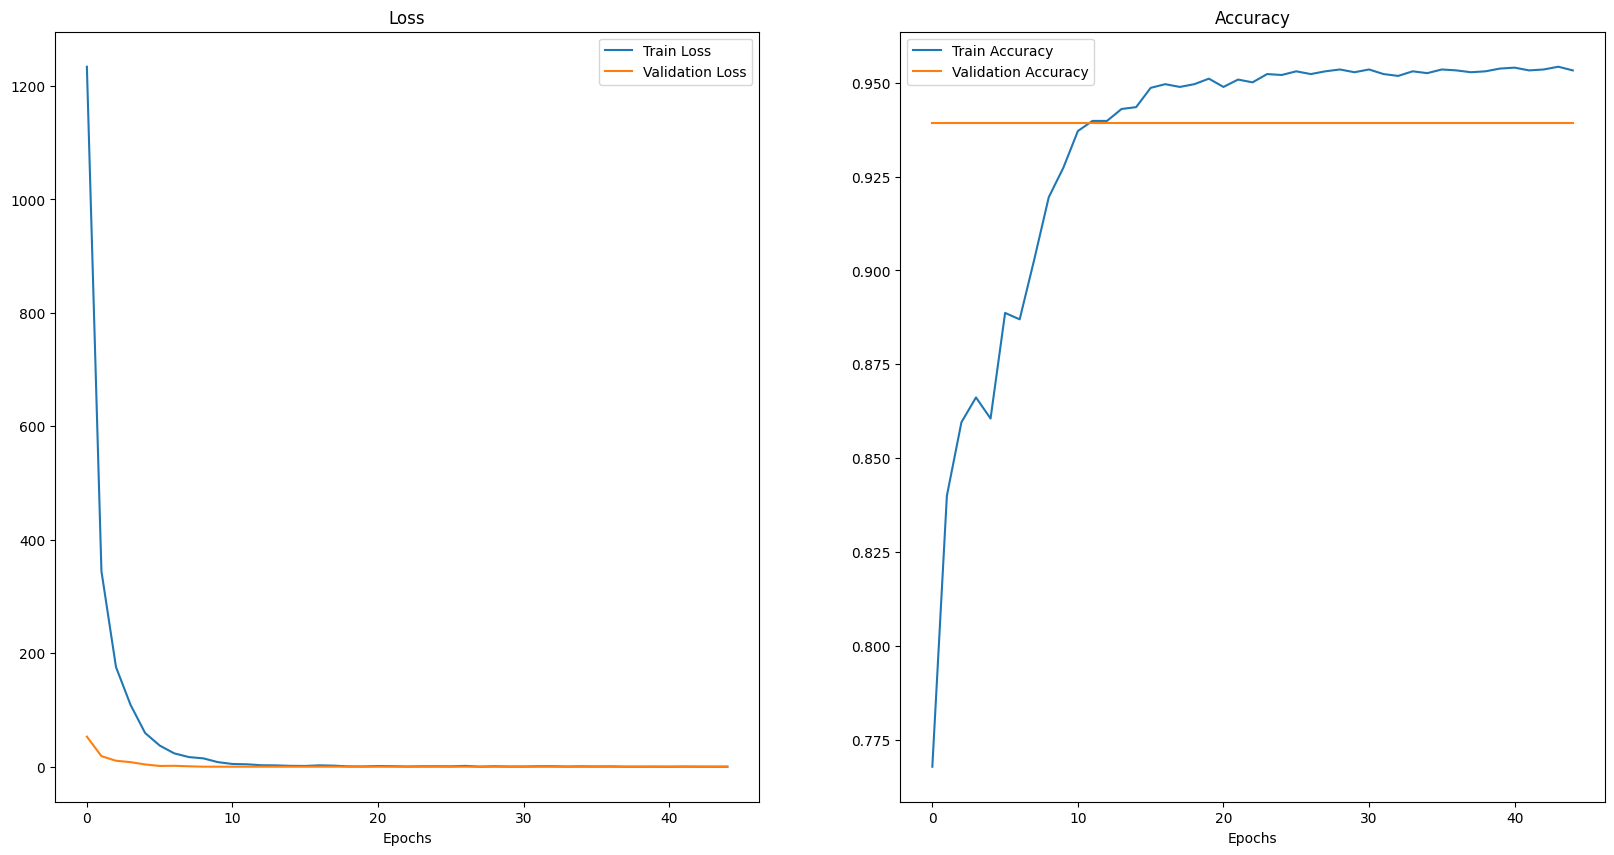

In [11]:
val_loss = history.history['val_loss']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
train_acc = history.history['accuracy']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.plot(train_loss, label='Train Loss')
ax1.plot(val_loss, label='Validation Loss')
ax1.set_title('Loss')
ax1.set_xlabel('Epochs')
ax1.legend()

ax2.plot(train_acc, label='Train Accuracy')
ax2.plot(val_acc, label='Validation Accuracy')
ax2.set_title('Accuracy')
ax2.set_xlabel('Epochs')
ax2.legend()

plt.show()

In [12]:
test_preds = nn.predict(X_test)
threshold = 0.25
test_preds = [1. if i > threshold else 0. for i in test_preds]
test_acc = accuracy_score(y_test, test_preds)

print('Test Set Metrics')
print('Model Accuracy:', test_acc)

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step
Test Set Metrics
Model Accuracy: 0.9393346379647749
